In [20]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.neighbors import KNeighborsClassifier
import seaborn as sns

data = pd.read_csv("C:/Users/charl/Downloads/archive/Titanic-Dataset.csv", index_col=0)

In [21]:
data.head()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,,
1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [22]:
data.drop(['Ticket', 'Fare', 'Cabin', 'Name'], axis=1, inplace=True)

In [23]:
data.columns

Index(['Survived', 'Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Embarked'], dtype='object')

In [24]:
data.nunique()

Survived     2
Pclass       3
Sex          2
Age         88
SibSp        7
Parch        7
Embarked     3
dtype: int64

In [25]:
data.dtypes

Survived      int64
Pclass        int64
Sex          object
Age         float64
SibSp         int64
Parch         int64
Embarked     object
dtype: object

Text(0.5, 1.0, 'People')

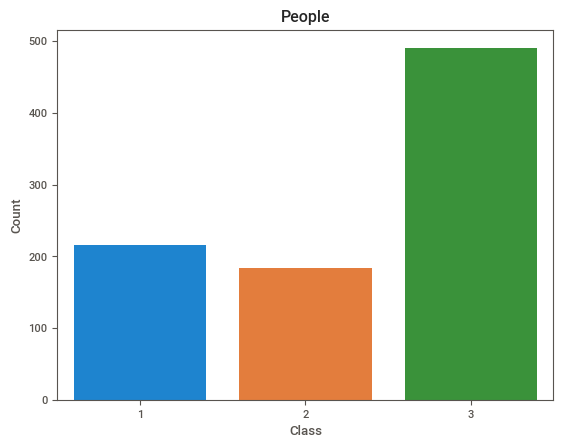

In [26]:
sns.countplot(data = data, x= "Pclass")
plt.xlabel("Class")
plt.ylabel("Count")
plt.title("People")

In [27]:
from sklearn.preprocessing import LabelEncoder
import pandas as pd

# 'Sex'와 'Embarked' 열을 LabelEncoder로 변환
le = LabelEncoder()
data['Sex'] = le.fit_transform(data['Sex'])
data['Embarked'] = le.fit_transform(data['Embarked'])

data.head()


,Survived,Pclass,Sex,Age,SibSp,Parch,Embarked
PassengerId,,,,,,,
1,0,3,1,22.0,1,0,2
2,1,1,0,38.0,1,0,0
3,1,3,0,26.0,0,0,2
4,1,1,0,35.0,1,0,2
5,0,3,1,35.0,0,0,2


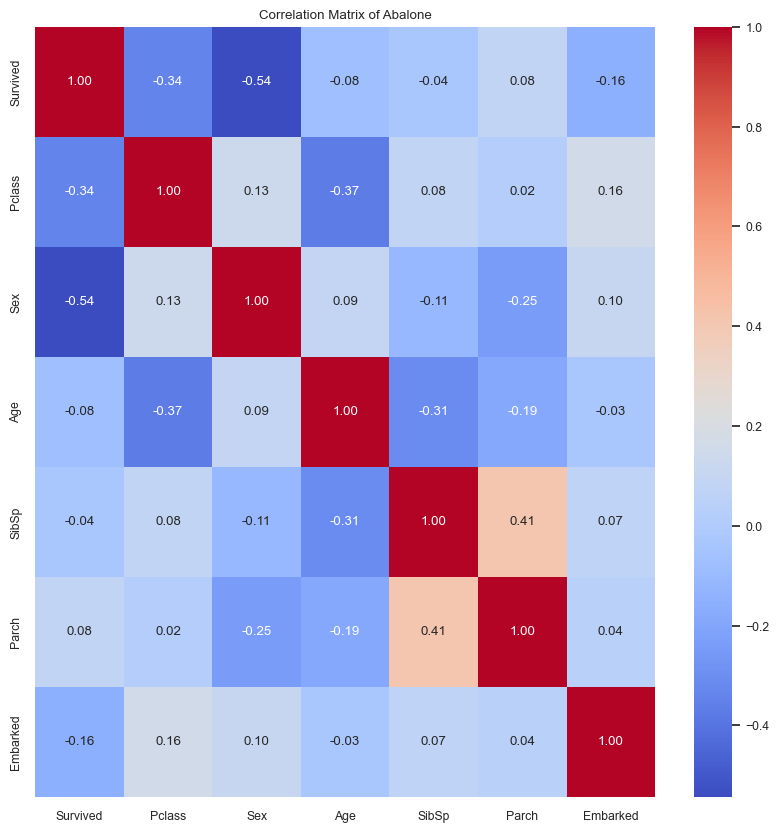

In [28]:
#상관 관계 행렬
data_corr=data.corr()

#히트맵
plt.figure(figsize=(10,10))
sns.set(font_scale=0.8)
sns.heatmap(data_corr, annot=True, cmap='coolwarm', fmt='.2f')
#sns.heatmap(data_corr, annot=True, cbar=False)
plt.title('Correlation Matrix of Abalone')
plt.show()


                                             |          | [  0%]   00:00 -> (? left)


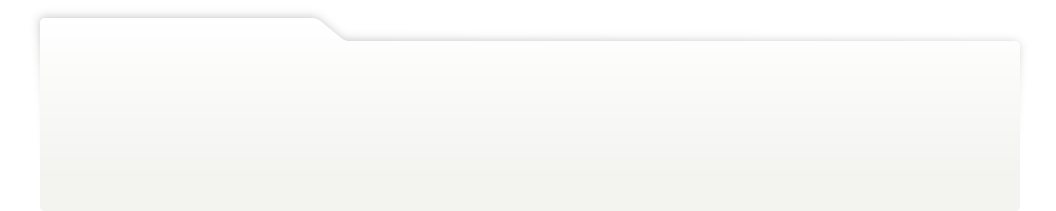
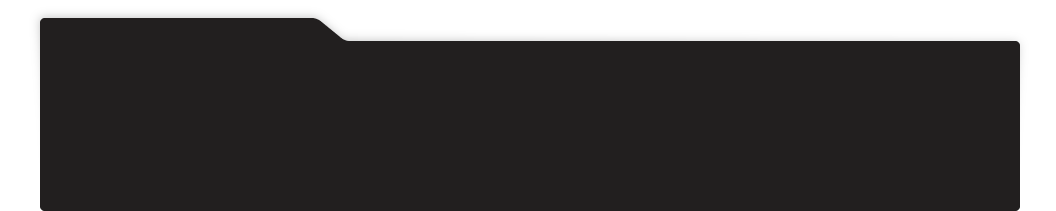
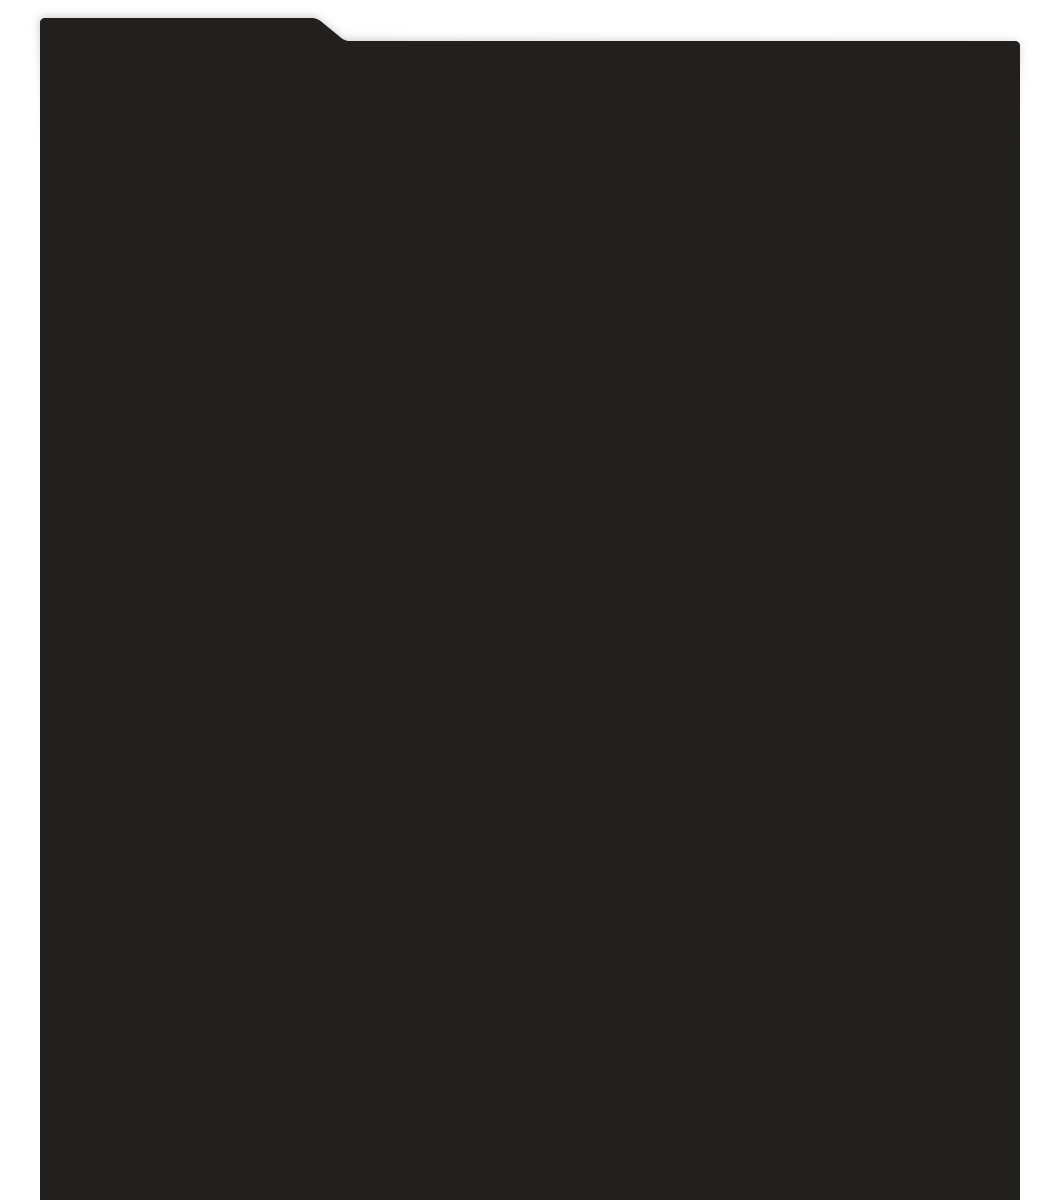
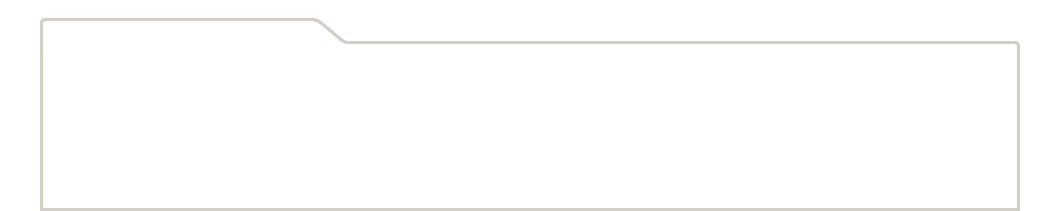
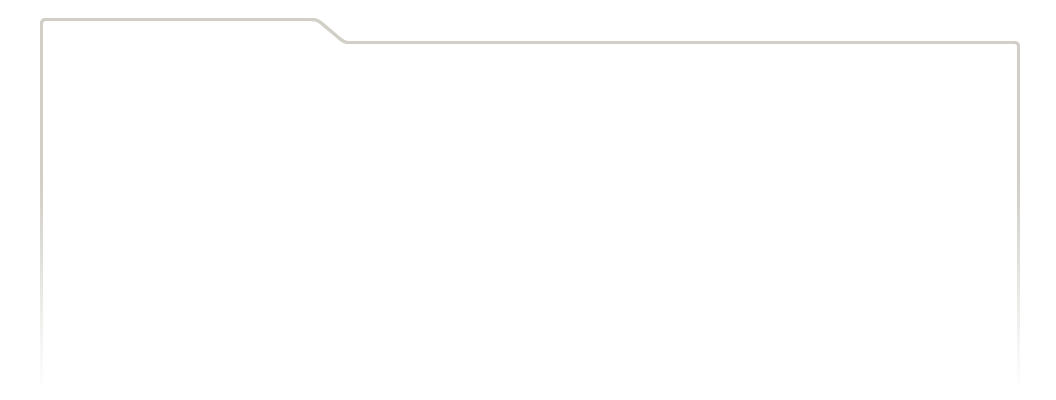
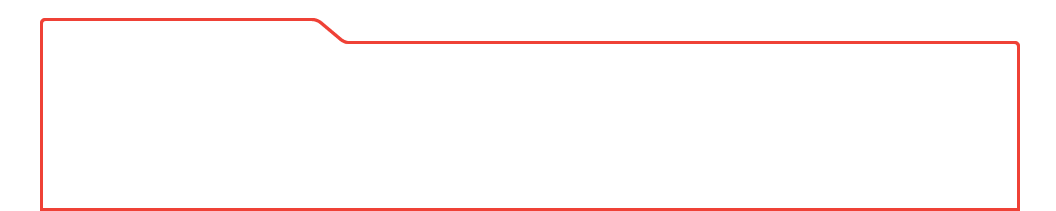
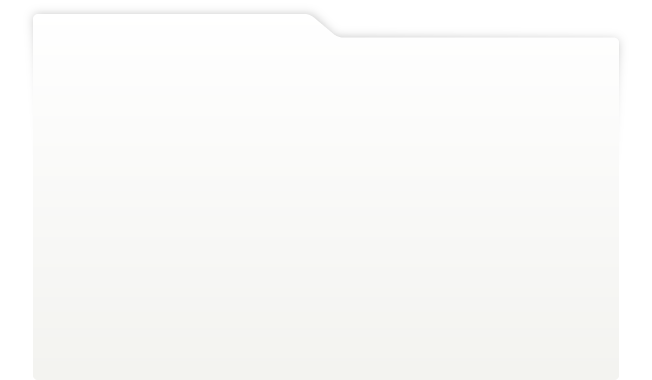
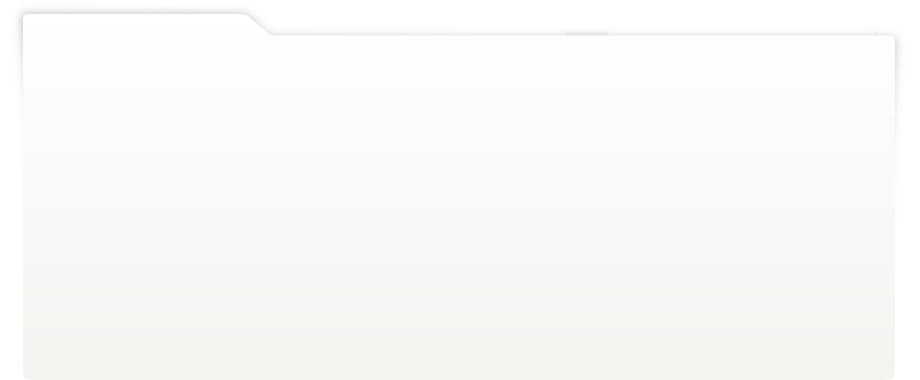
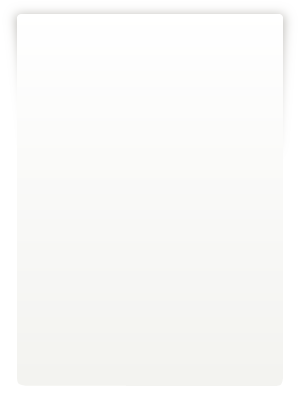
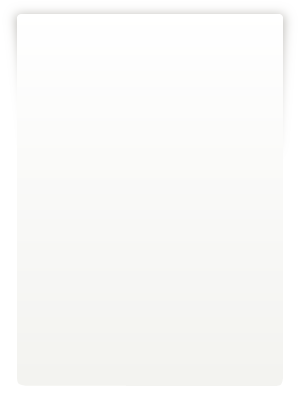
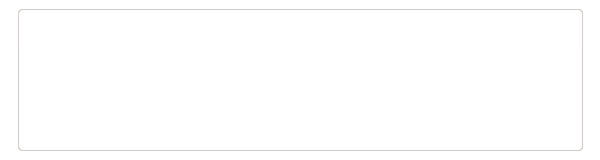
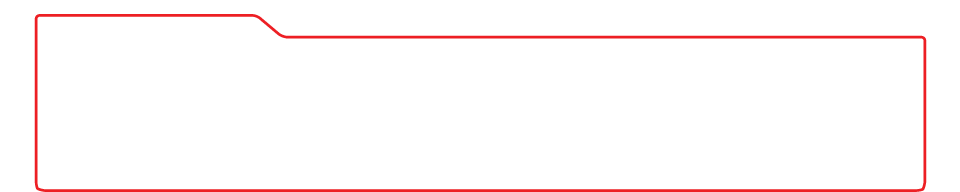
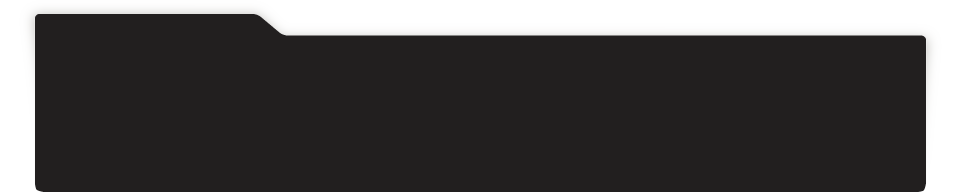
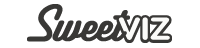
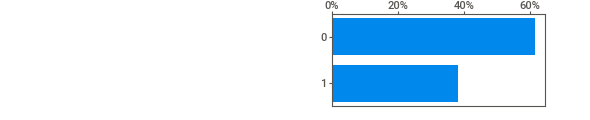
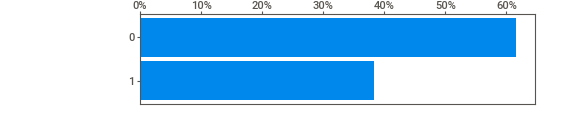
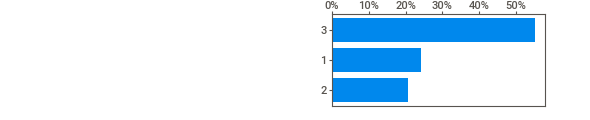
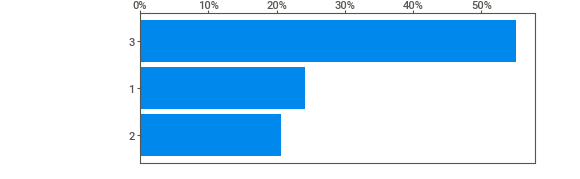
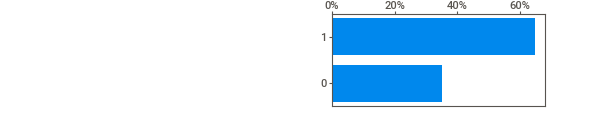
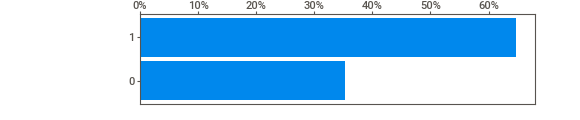
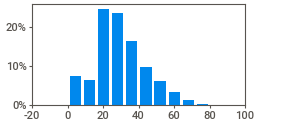
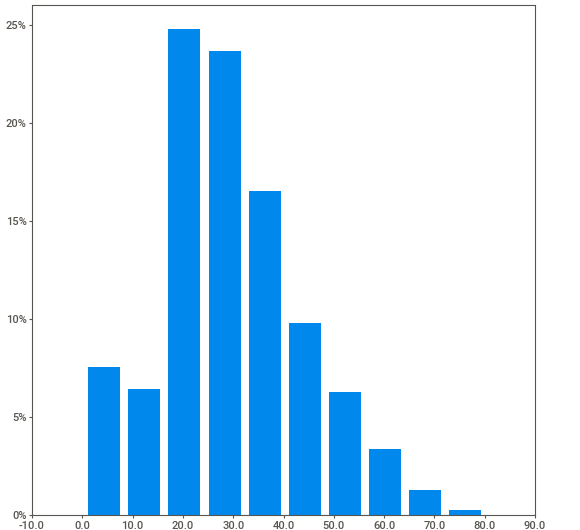
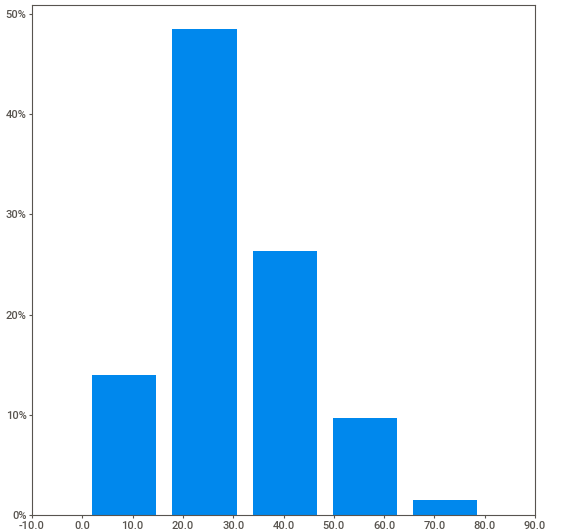
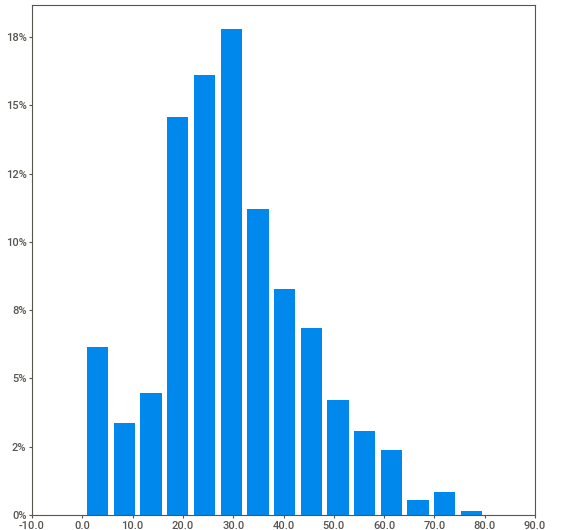
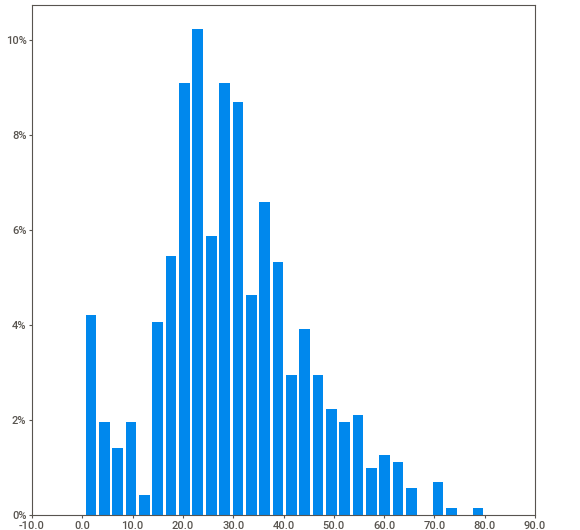
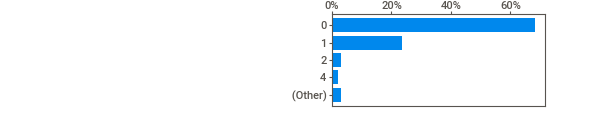
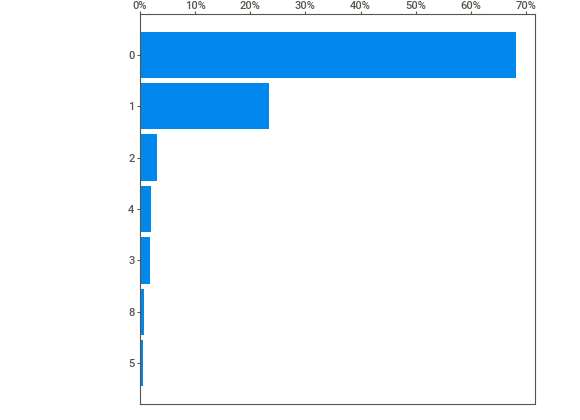
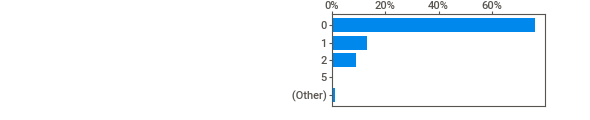
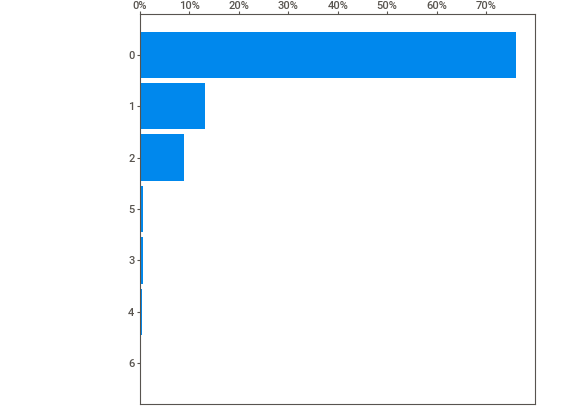
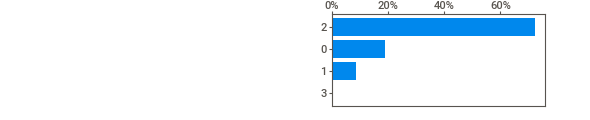
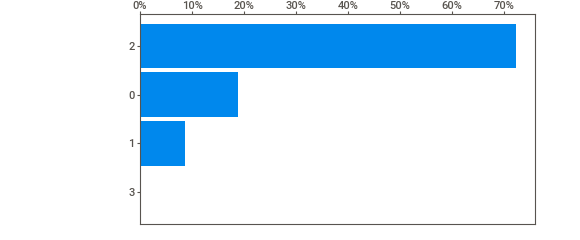
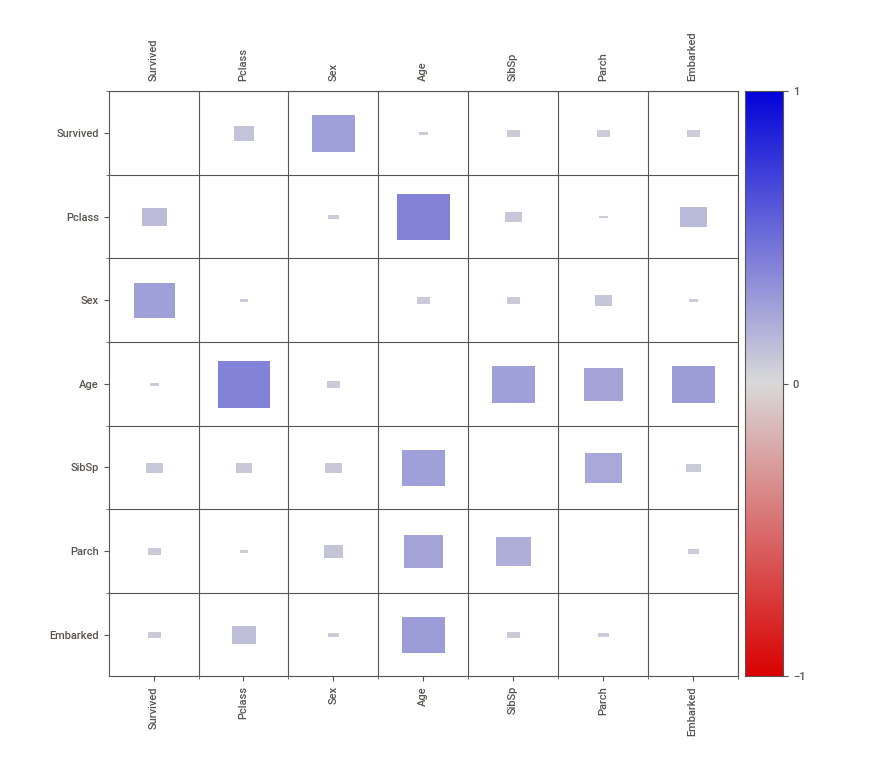
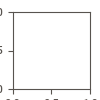

In [29]:
import sweetviz
sweetviz.analyze(data).show_notebook()

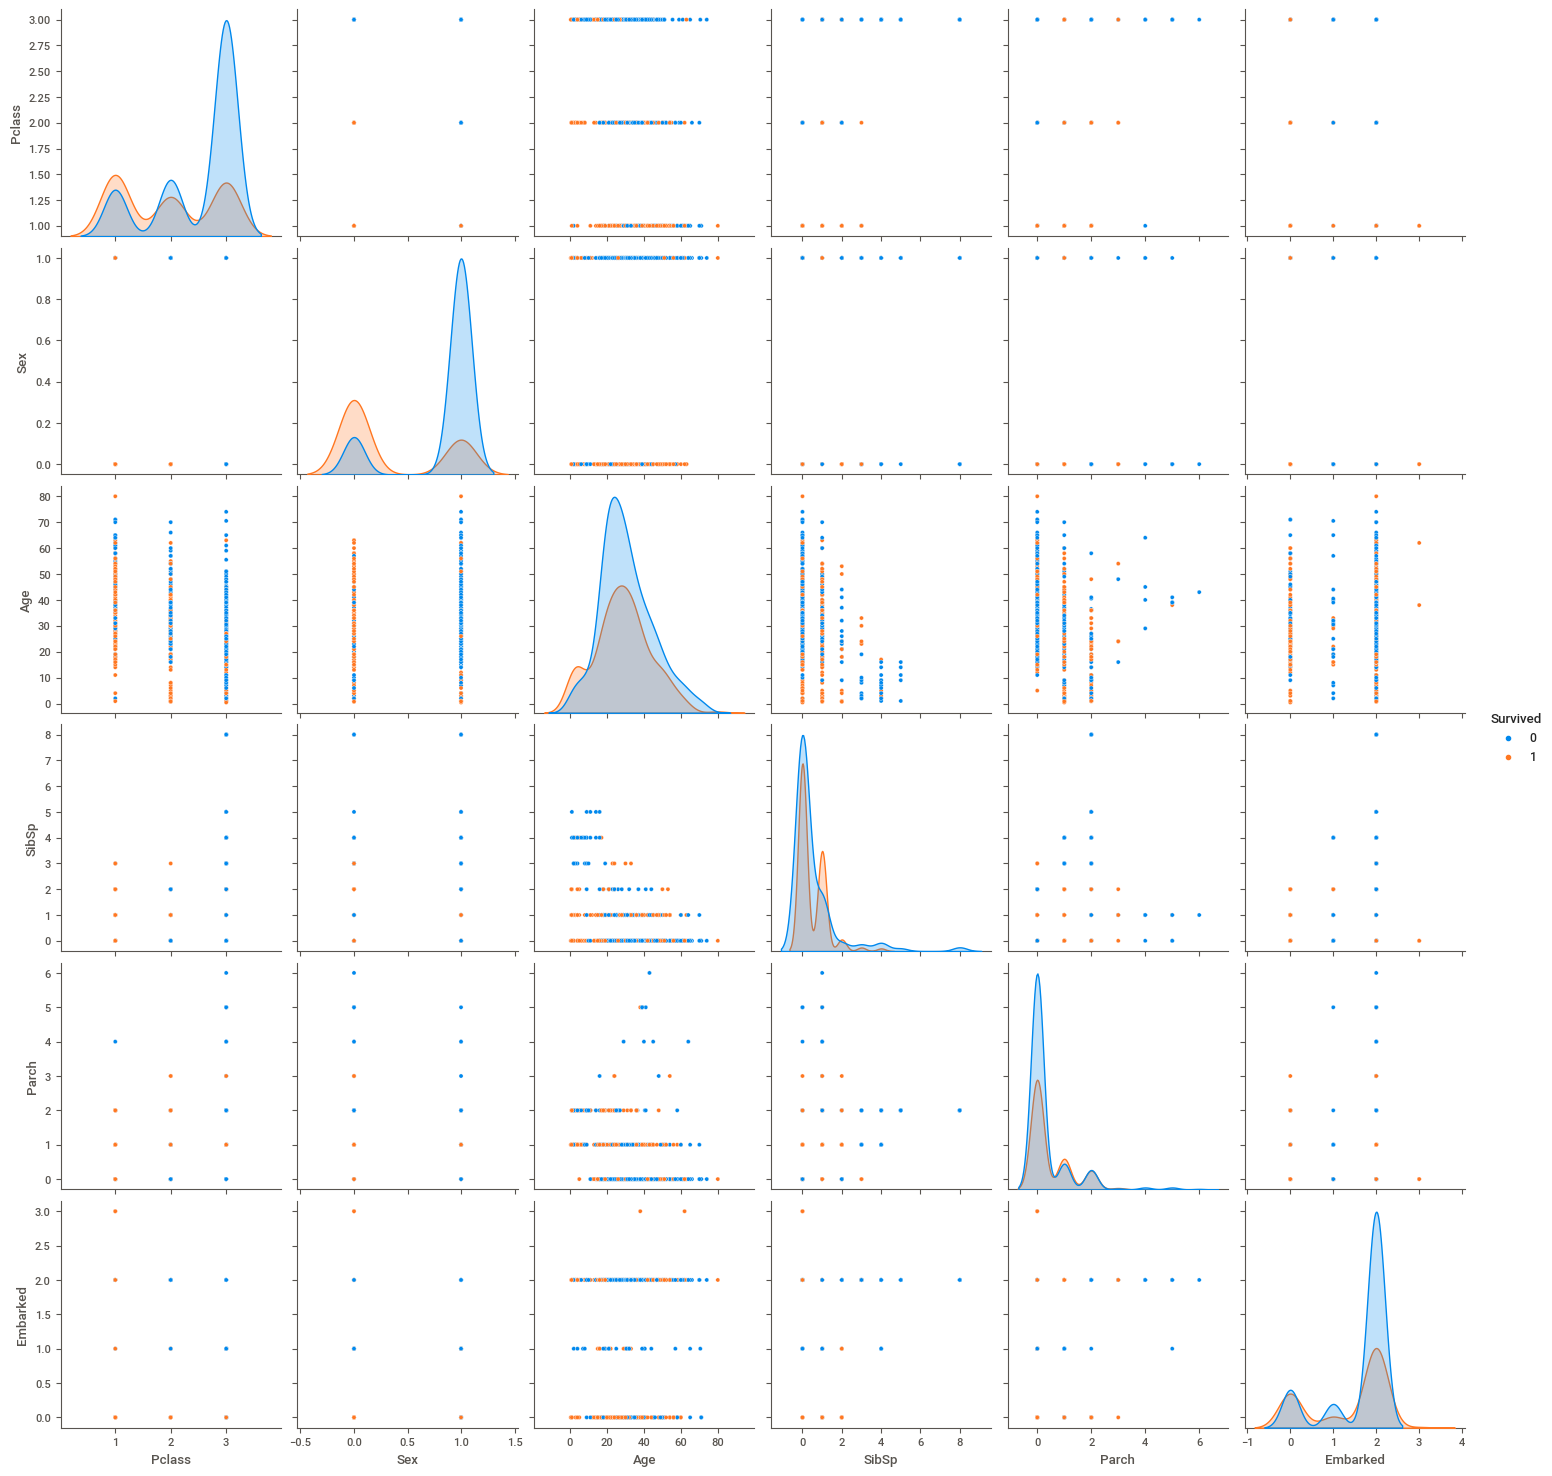

In [30]:
import seaborn as sns

sns.pairplot(data,
             vars=['Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Embarked'],
            hue = 'Survived')
plt.show()

In [31]:
data.nunique()

Survived     2
Pclass       3
Sex          2
Age         88
SibSp        7
Parch        7
Embarked     4
dtype: int64

In [32]:
data.dtypes

Survived      int64
Pclass        int64
Sex           int32
Age         float64
SibSp         int64
Parch         int64
Embarked      int32
dtype: object

In [41]:
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.tree import DecisionTreeRegressor
from sklearn.impute import SimpleImputer
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.svm import SVR
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error


# 주어진 데이터에서 'residual sugar', 'alcohol', 'density' 열을 추출
#X = data.drop('Survived', axis=1)
X = data[['Pclass', 'Age', 'Sex']]
y = data['Survived']
# 데이터를 훈련 세트와 테스트 세트로 분할
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=0)

# StandardScaler 적용
standard_scaler = StandardScaler()
X_train_standard_scaled = standard_scaler.fit_transform(X_train)
X_test_standard_scaled = standard_scaler.transform(X_test)

# NaN 값을 평균으로 채우기
imputer = SimpleImputer(strategy='mean')
X_train_imputed = imputer.fit_transform(X_train)
X_test_imputed = imputer.transform(X_test)

# 사용할 변수명을 standard_scaler로 수정
X_train_standard_scaled = standard_scaler.fit_transform(X_train_imputed)
X_test_standard_scaled = standard_scaler.transform(X_test_imputed)

In [42]:
# DecisionTreeRegressor 사용
regressor = DecisionTreeRegressor()
regressor.fit(X_train_standard_scaled, y_train)

# 예측 및 성능 평가
pred_reg = regressor.predict(X_test_standard_scaled)

# 훈련 세트에서의 정확도 출력
print("훈련 세트 정확도:", regressor.score(X_train_standard_scaled, y_train))

# 테스트 세트에서의 정확도 및 혼동 행렬 출력
pred_reg_binary = [1 if pred >= 0.5 else 0 for pred in pred_reg]  # convert to binary predictions
print("테스트 세트 정확도:", accuracy_score(y_test, pred_reg_binary))
print("혼동 행렬:\n", confusion_matrix(y_test, pred_reg_binary))


훈련 세트 정확도: 0.6675735564978946
테스트 세트 정확도: 0.7399103139013453
혼동 행렬:
 [[109  30]
 [ 28  56]]


In [43]:
# RandomForestRegressor 사용
rf_regressor = RandomForestRegressor()
rf_regressor.fit(X_train_standard_scaled, y_train)

# 예측 및 성능 평가
pred_rf_regressor = rf_regressor.predict(X_test_standard_scaled)

# 훈련 세트에서의 정확도 출력 (R-squared score for regression)
print("훈련 세트 정확도 (R-squared):", rf_regressor.score(X_train_standard_scaled, y_train))

# 이진 분류를 위해 예측값을 0 또는 1로 변환
pred_rf_binary = [1 if pred >= 0.5 else 0 for pred in pred_rf_regressor]

# 테스트 세트에서의 정확도 및 혼동 행렬 출력
print("테스트 세트 정확도:", accuracy_score(y_test, pred_rf_binary))
print("혼동 행렬:\n", confusion_matrix(y_test, pred_rf_binary))

훈련 세트 정확도 (R-squared): 0.6464437898127101
테스트 세트 정확도: 0.757847533632287
혼동 행렬:
 [[113  26]
 [ 28  56]]


In [44]:
# Linear Regression 모델 훈련 및 예측
clf_lr = LinearRegression()
clf_lr.fit(X_train_standard_scaled, y_train)
pred_lr = clf_lr.predict(X_test_standard_scaled)

# 훈련 세트에서의 결정 계수 출력
print("훈련 세트 결정 계수 (R-squared):", clf_lr.score(X_train_standard_scaled, y_train))

# 평균 제곱근 오차 출력
mse = np.sqrt(mean_squared_error(pred_lr, y_test))
print('평균제곱근오차:', mse)

훈련 세트 결정 계수 (R-squared): 0.37703068771696824
평균제곱근오차: 0.3754010920761299


In [45]:
# SVR 모델 훈련 및 예측
clf_svm = SVR()
clf_svm.fit(X_train_standard_scaled, y_train)
pred_svm = clf_svm.predict(X_test_standard_scaled)

# 훈련 세트에서의 결정 계수 출력
print("훈련 세트 결정 계수 (R-squared):", clf_svm.score(X_train_standard_scaled, y_train))

# 평균 제곱근 오차 출력
mse = np.sqrt(mean_squared_error(pred_svm, y_test))
print('평균제곱근오차:', mse)

훈련 세트 결정 계수 (R-squared): 0.35767747228253355
평균제곱근오차: 0.4052407406548891
